In [1]:
from bagpy import bagreader
import pandas as pd
import numpy as np
from scipy.spatial.transform import Rotation as R

# Initialize an empty DataFrame to store the results
global_df = pd.DataFrame()

# Iterate over the different heights
for height in ['ground', '10cm', '30cm']:
    # Path to your ROS bag file (modify based on the height)
    bag_file = f'bags/tof_imu_altitude_nodes_characterization_{height}.bag'
    
    # Read the bag into a pandas dataframe
    b = bagreader(bag_file)

    # Iterate over each topic in the ROS bag
    for topic_name in b.topic_table['Topics']:
        df = pd.read_csv(b.message_by_topic(topic_name))

        if b.topic_table[b.topic_table['Topics'] == topic_name]['Types'].values[0] == 'sensor_msgs/Range':
            # ToF data (distance)
            mean = df['range'].mean()
            std = df['range'].std()
            rsd = (std / np.abs(mean)) * 100 if mean != 0 else np.nan
            
            # Add the result to global_df using pd.concat
            global_df = pd.concat([global_df, pd.DataFrame({
                'Height': [height],
                'Quantity': ['ToF Distance (m)'],
                'Mean': [mean],
                'Standard Deviation': [std],
                'RSD (%)': [rsd]
            })], ignore_index=True)

        if b.topic_table[b.topic_table['Topics'] == topic_name]['Types'].values[0] == 'sensor_msgs/Imu':
            # Compute the mean, standard deviation, and relative standard deviation for IMU data
            for axis in ['x', 'y', 'z']:
                # Linear Acceleration
                mean = df[f'linear_acceleration.{axis}'].mean()
                std = df[f'linear_acceleration.{axis}'].std()
                rsd = (std / np.abs(mean)) * 100 if mean != 0 else np.nan
                
                # Add to global_df using pd.concat
                global_df = pd.concat([global_df, pd.DataFrame({
                    'Height': [height],
                    'Quantity': [f'Linear Acceleration {axis.upper()} (m/s^2)'],
                    'Mean': [mean],
                    'Standard Deviation': [std],
                    'RSD (%)': [rsd]
                })], ignore_index=True)

                # Angular Velocity
                mean = df[f'angular_velocity.{axis}'].mean()
                std = df[f'angular_velocity.{axis}'].std()
                rsd = (std / np.abs(mean)) * 100 if mean != 0 else np.nan
                
                # Add to global_df using pd.concat
                global_df = pd.concat([global_df, pd.DataFrame({
                    'Height': [height],
                    'Quantity': [f'Angular Velocity {axis.upper()} (rad/s)'],
                    'Mean': [mean],
                    'Standard Deviation': [std],
                    'RSD (%)': [rsd]
                })], ignore_index=True)

            # Orientation (Quaternion -> Euler)
            quaternions = df[['orientation.w', 'orientation.x', 'orientation.y', 'orientation.z']].to_numpy()
            rot = R.from_quat(quaternions)
            euler_angles = rot.as_euler('zyx', degrees=True)  # Convert to degrees (roll, pitch, yaw)

            # Add Euler angles to the DataFrame
            df['roll'] = euler_angles[:, 0]
            df['pitch'] = euler_angles[:, 1]
            df['yaw'] = euler_angles[:, 2]

            # Compute the mean, std, and rsd for roll, pitch, yaw
            for axis in ['roll', 'pitch', 'yaw']:
                mean = df[axis].mean()
                std = df[axis].std()
                rsd = (std / np.abs(mean)) * 100 if mean != 0 else np.nan
                
                # Add to global_df using pd.concat
                global_df = pd.concat([global_df, pd.DataFrame({
                    'Height': [height],
                    'Quantity': [f'{axis.capitalize()} (Euler) (degrees)'],
                    'Mean': [mean],
                    'Standard Deviation': [std],
                    'RSD (%)': [rsd]
                })], ignore_index=True)

# Convert the DataFrame to LaTeX format
latex_table = global_df.to_latex(index=False, caption='IMU and ToF Mean and Standard Deviation at Different Heights')

global_df

# # Optionally save the LaTeX table to a file
# with open("imu_tof_stats_table.tex", "w") as f:
#     f.write(latex_table)


[INFO]  Data folder bags/tof_imu_altitude_nodes_characterization_ground already exists. Not creating.
[INFO]  Data folder bags/tof_imu_altitude_nodes_characterization_10cm already exists. Not creating.
[INFO]  Data folder bags/tof_imu_altitude_nodes_characterization_30cm already exists. Not creating.


,Height,Quantity,Mean,Standard Deviation,RSD (%)
0,ground,ToF Distance (m),9.161251e-03,0.001520,16.586255
1,ground,Linear Acceleration X (m/s^2),7.937463e-02,0.007406,9.329919
2,ground,Angular Velocity X (rad/s),4.894891e-05,0.000705,1439.765032
3,ground,Linear Acceleration Y (m/s^2),-1.875769e-03,0.004262,227.213548
4,ground,Angular Velocity Y (rad/s),-8.704940e-06,0.000803,9225.931662
5,ground,Linear Acceleration Z (m/s^2),9.781409e+00,0.008905,0.091036
6,ground,Angular Velocity Z (rad/s),-4.963900e-05,0.000701,1411.696511
7,ground,Roll (Euler) (degrees),-4.873343e-01,0.015122,3.102968
8,ground,Pitch (Euler) (degrees),-3.909447e-02,0.012370,31.640950
9,ground,Yaw (Euler) (degrees),9.001977e+01,0.012463,0.013845


# Measuring the frequency of topics

The frequency of the measurements of the IMU and Time of Flight sensors is measured using the `rostopic hz` command. The following image contains the output of the command:

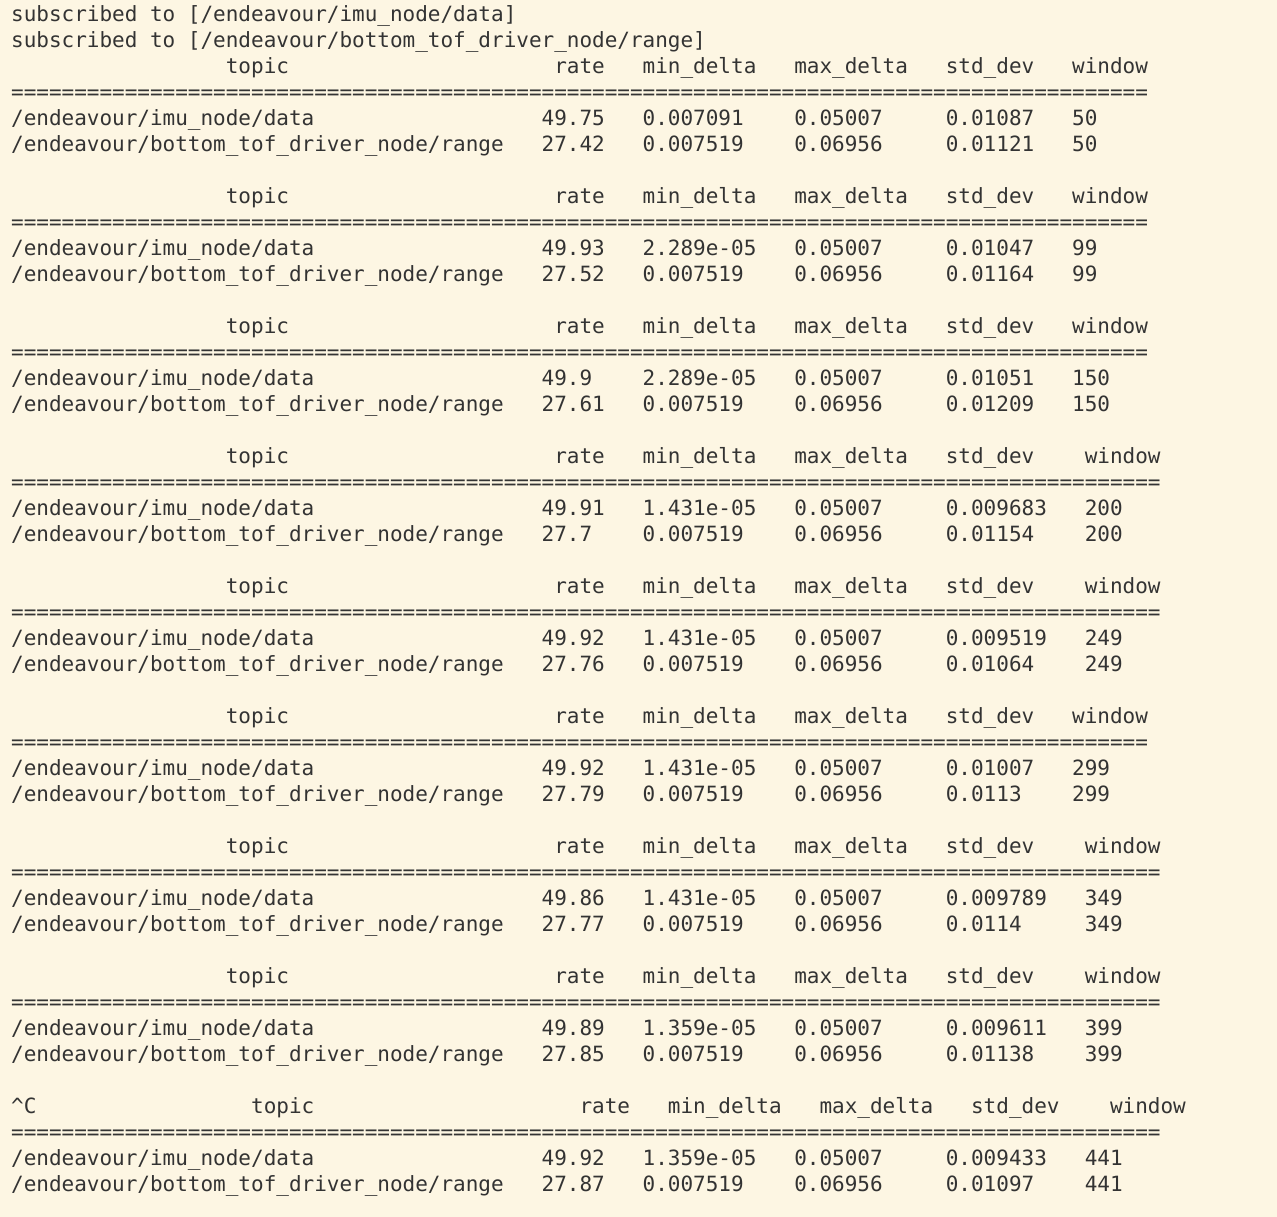

As visible in the image the frequencies have small standard deviations compared to the average rate.

# Optical flow node

We characterize the optical flow (visual odometry) node. This node takes as input images from the camera and compute the motion vectors that measure the displacements of the same pixels in two consecutive frames. Then these are projected to the ground and the velocity vector of the drone is estimated by averaging them out.

In [7]:
from bagpy import bagreader
import pandas as pd

# Read the bag file
b = bagreader('bags/visual_odometry_pi4.bag')

# Display available topics in the bag
print(b.topic_table)

# Image resolution 80x60

[INFO]  Data folder bags/visual_odometry_pi4 already exists. Not creating.
                                         Topics              Types  \
0  /discovery/optical_flow_node/visual_odometry  nav_msgs/Odometry   

   Message Count  Frequency  
0            569  22.030932  


In [5]:
# Read the messages from the odometry topic into a DataFrame
df = pd.read_csv(b.message_by_topic('/discovery/optical_flow_node/visual_odometry'))

# Compute mean and standard deviation for the linear velocities
for axis in ['x', 'y', 'z']:
    linear_mean = df[f'twist.twist.linear.{axis}'].mean()
    linear_std = df[f'twist.twist.linear.{axis}'].std()

    if axis == 'z':
        assert linear_mean == 0, "[WARNING] Linear velocity in z-axis should be zero!"
    
    print(f"Linear Velocity {axis.upper()}: Mean = {linear_mean:.5f}, Std = {linear_std:.5f}")


Linear Velocity X: Mean = 0.00039, Std = 0.00270
Linear Velocity Y: Mean = 0.00109, Std = 0.01113
Linear Velocity Z: Mean = 0.00000, Std = 0.00000
